# CAPFED

In [ ]:
!pip install unidecode

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import unidecode

In [3]:
df = pd.read_csv("properatti.csv")

In [4]:
df.head(50)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [8]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


# Vamos a borrar outliers: pisos mayores a 45 y operaciones en 'UYU' o 'PEN', asumimos que son ruido y los borramos

In [9]:
df.loc[df['floor']>=45,'floor'] = np.nan
df.loc[df['rooms']>=10,'rooms'] = np.nan
df.loc[df['price_usd_per_m2']==np.inf,'price_usd_per_m2'] = np.nan
#df['price_usd_per_m2'].apply(lambda x :np.nan if x == np.inf else x)

df.loc[df['currency']=='UYU','currency'] = np.nan
df.loc[df['currency']=='PEN','currency'] = np.nan

# Vamos a convertir el texto de las columnas 'title' y 'description' a minúsculas y pasar a dos decimales todo

In [10]:
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()
pd.options.display.float_format = '{:.2f}'.format

# Vamos a completar la información faltante en base a un diccionario


# Creo el diccionario del parser
Cada nueva fila debe tener formato: ['regEx para buscar', 'regEx para extraer números contenidos dentro del resultado de la regEx de búsqueda', 'columna donde buscar', 'columna donde guardar el dato faltante', 'tipo del dato a extraer']

In [11]:
col_names =  ['lookup_regex', 'extract_regex', 'column_to_lookup','column_to_complete','value_type','value_offset','extra_condition']
diccionario  = pd.DataFrame(columns = col_names)
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'title' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'description' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
#diccionario.loc[len(diccionario)] = ['/d abc', '/d', 'description', 'metros2', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'description', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'title', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'title', 'floor', 'float',1, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'description', 'floor', 'float',1, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'description', 'floor', 'float',10, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'title', 'floor', 'float',10, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'title', 'floor', 'float',2, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'description', 'floor', 'float',2, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'description', 'floor', 'float',3, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}] #CHEQUEAR. HAY UN EJEMPLO QUE CUANDO DICE TERCER ENCUENTRA UNA OBSERVACION QUE LITERALMENTE DICE TERCERA EDAD. QUE HACE EL CODIGO EN ESTE CASO?
diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'title', 'floor', 'float',3, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'title', 'floor', 'float',4, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'description', 'floor', 'float',4, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}] #mismo caso. Puede llegar a traer una observacion que dice 4 cuartoSS ????
diccionario.loc[len(diccionario)] = ['quianto|QUINTO|Quinto|5to', '', 'title', 'floor', 'float',5, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['quinto|QUINTO|Quinto|5to', '', 'description', 'floor', 'float',5, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'description', 'floor', 'float',6, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'title', 'floor', 'float',6, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'title', 'floor', 'float',7, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'description', 'floor', 'float',7, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'description', 'floor', 'float',8, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'title', 'floor', 'float',8, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'title', 'floor', 'float',9, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'description', 'floor', 'float',9, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'property_type', 'value' : 'apartment', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}Hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*', '\d{1,2}', 'title', 'rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*','\d{1,2}','description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*','\d{1,2}', 'description','rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*|\d{1,7} {0,3}dólar*','\d{1,7}','title','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*','\d{1,7}','description','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {0,3}peso*|\d{1,8} {0,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','title', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {1,3}peso*|\d{1,8} {1,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','description', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['pileta|piscina', '', 'description', 'pool', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['pileta|piscina', '', 'title', 'pool', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['jacuzzi', '', 'description', 'jacuzzi', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['jacuzzi', '', 'title', 'jacuzzi', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['garage|cochera', '', 'description', 'garage', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['garage|cochera', '', 'title', 'garage', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['gimnasio|gym|tenis|tennis|squash|paddle', '', 'description', 'sports', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['gimnasio|gym|tenis|tennis|squash|paddle', '', 'title', 'sports', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sum|usos multiples', '', 'description', 'sum', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sum|usos multiples', '', 'title', 'sum', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['vigilancia|seguridad|garita|guardia', '', 'description', 'security', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['vigilancia|seguridad|garita|guardia', '', 'title', 'security', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['a estrenar|nuevo|nueva', '', 'description', 'new', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['a estrenar|nuevo|nueva', '', 'title', 'new', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['subte|tren|bus|autopista', '', 'description', 'transportation', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['subte|tren|bus|autopista', '', 'title', 'transportation', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['terraza|balcon', '', 'description', 'terrace', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['terraza|balcon', '', 'title', 'terrace', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['parrilla|asador|barbacoa', '', 'description', 'parrilla', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['parrilla|asador|barbacoa', '', 'title', 'parrilla', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['pulmón|pulmon|contrafrente|contra frente', '', 'description', 'quiet', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['pulmón|pulmon|contrafrente|contra frente', '', 'title', 'quiet', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]


### Inicializo las columnas dummy para guardar nuevos datos de ammenities varios

In [12]:
df['pool'] = np.nan
df['jacuzzi'] = np.nan
df['garage'] = np.nan
df['sports'] = np.nan
df['sum'] = np.nan
df['security'] = np.nan
df['new'] = np.nan
df['transportation'] = np.nan
df['terrace'] = np.nan
df['parrilla'] = np.nan
df['quiet'] = np.nan

In [13]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
count,121220.00,102503.00,69670.00,69670.00,100810.00,100810.00,100810.00,81892.00,101313.00,68617.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,60609.50,3574442.32,-34.63,-59.27,468525.93,4229396.83,239700.58,233.80,133.05,2160.09,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,34993.34,354130.62,1.98,2.30,2260100.59,6904714.13,391323.88,1782.22,724.35,2759.29,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,0.00,3427208.00,-54.82,-75.68,0.00,0.00,0.00,0.00,0.00,0.60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,30304.75,3430234.00,-34.67,-58.73,110000.00,1583309.44,89733.88,50.00,45.00,1218.18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,60609.50,3433910.00,-34.60,-58.48,185000.00,2558452.50,145000.00,84.00,75.00,1800.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,90914.25,3836668.00,-34.44,-58.40,420000.00,4675792.50,265000.00,200.00,150.00,2486.41,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,121219.00,6948895.00,4.55,-53.73,650000000.00,821271104.30,46545445.00,200000.00,187000.00,206333.33,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Defino la función que procesa el dataframe iterando en base al diccionaro:

In [14]:
def parse(string,pattern):
    matches = re.search(pattern["lookup_regex"], string)
    parse_data = None
    if matches != None:
        if (pattern["value_type"] == 'float') and (pattern["extract_regex"] != ''):
            parse_data = float( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + float(pattern["value_offset"])
        elif (pattern["value_type"] == 'int') and (pattern["extract_regex"] != ''):
            parse_data = int( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + int(pattern["value_offset"])
        elif (pattern["value_type"] == 'string') and (pattern["extract_regex"] != ''):
            parse_data = re.search(pattern["extract_regex"], matches.group(0)).group(0) + pattern["value_offset"]
        elif pattern["value_type"] == 'float':
            parse_data = float(pattern["value_offset"])
        elif pattern["value_type"] == 'int':
            parse_data = int(pattern["value_offset"])
        else:
            parse_data = pattern["value_offset"]
    else:
        parse_data = np.nan;
    return parse_data

def df_parser(data,parse_dictionary):
    for pattern_row_index, pattern in parse_dictionary.iterrows():
        rows_to_parse = (data[pattern["column_to_complete"]].isnull() == True) & (pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True) 
        info_to_parse = data[rows_to_parse][pattern["column_to_lookup"]]
        valid_info = info_to_parse[info_to_parse.apply(lambda a : (type(a) is str) and (a != ''))]
        data.loc[rows_to_parse, pattern["column_to_complete"]] = valid_info.apply(parse, args=([pattern]))

### Corro la función para parsear la información

In [15]:
df_parser(df,diccionario)

### Fuerzo a que las dummies que no se completaron, sean cero

In [16]:
df.loc[df["pool"].isnull() == True,"pool"] = float(0)
df.loc[df["jacuzzi"].isnull() == True,"jacuzzi"] = float(0)
df.loc[df["garage"].isnull() == True, "garage"] = float(0)
df.loc[df["sports"].isnull() == True, "sports"] = float(0)
df.loc[df["sum"].isnull() == True, "sum"] = float(0)
df.loc[df["security"].isnull() == True, "security"] = float(0)
df.loc[df["new"].isnull() == True, "new"] = float(0)
df.loc[df["transportation"].isnull() == True, "transportation"] = float(0)
df.loc[df["terrace"].isnull() == True, "terrace"] = float(0)
df.loc[df["parrilla"].isnull() == True, "parrilla"] = float(0)
df.loc[df["quiet"].isnull() == True, "quiet"] = float(0)

In [17]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
count,121220.00,102503.00,69670.00,69670.00,100810.00,100840.00,100825.00,81892.00,108686.00,68617.00,...,121220.00,121220.00,121220.00,121220.00,121220.00,121220.00,121220.00,121220.00,121220.00,121220.00
mean,60609.50,3574442.32,-34.63,-59.27,468525.93,4228139.02,239664.93,233.80,146.17,2160.09,...,0.03,0.42,0.09,0.13,0.12,0.21,0.21,0.32,0.32,0.10
std,34993.34,354130.62,1.98,2.30,2260100.59,6904071.99,391305.68,1782.22,748.34,2759.29,...,0.18,0.49,0.29,0.33,0.32,0.40,0.41,0.47,0.46,0.30
min,0.00,3427208.00,-54.82,-75.68,0.00,0.00,0.00,0.00,0.00,0.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30304.75,3430234.00,-34.67,-58.73,110000.00,1583309.44,89733.88,50.00,45.00,1218.18,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,60609.50,3433910.00,-34.60,-58.48,185000.00,2558452.50,145000.00,84.00,75.00,1800.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,90914.25,3836668.00,-34.44,-58.40,420000.00,4675792.50,265000.00,200.00,151.00,2486.41,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
max,121219.00,6948895.00,4.55,-53.73,650000000.00,821271104.30,46545445.00,200000.00,187000.00,206333.33,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Finalmente, vamos a calcular los valores u$d/m2 en donde falten:

In [18]:
filas = (df['price_usd_per_m2'].isnull() == True) & (df['surface_total_in_m2'].isnull() != True) & (df['surface_total_in_m2'] != 0) & (df['price_aprox_usd'].isnull() != True)
df.loc[ filas,'price_usd_per_m2'] = df.loc[ filas,'price_aprox_usd']/df.loc[ filas,'surface_total_in_m2']

In [19]:
filas = (df['price_usd_per_m2'].isnull() == True) & (df['surface_covered_in_m2'].isnull() != True) & (df['surface_covered_in_m2'] != 0) & (df['price_aprox_usd'].isnull() != True)
df.loc[ filas,'price_usd_per_m2'] = df.loc[ filas,'price_aprox_usd']/df.loc[ filas,'surface_covered_in_m2']

In [20]:
filas = (df['price_per_m2'].isnull() == True) & (df['surface_total_in_m2'].isnull() != True) & (df['surface_total_in_m2'] != 0) & (df['price_aprox_local_currency'].isnull() != True)
df.loc[ filas,'price_per_m2'] = df.loc[ filas,'price_aprox_local_currency']/df.loc[ filas,'surface_total_in_m2']

In [21]:
filas = (df['price_per_m2'].isnull() == True) & (df['surface_covered_in_m2'].isnull() != True) & (df['surface_covered_in_m2'] != 0) & (df['price_aprox_local_currency'].isnull() != True)
df.loc[ filas,'price_per_m2'] = df.loc[ filas,'price_aprox_local_currency']/df.loc[ filas,'surface_covered_in_m2']

### Luego, vamos a imputar los valores faltantes de superficies

In [22]:
filas = (df['surface_covered_in_m2'].isnull() == True) & (df['surface_total_in_m2'].isnull() == False) & (df['property_type'] != "house")
df.loc[ filas,'surface_covered_in_m2'] = df.loc[ filas,'surface_total_in_m2']

In [23]:
filas = (df['surface_total_in_m2'].isnull() == True) & (df['surface_covered_in_m2'].isnull() == False) & (df['property_type'] != "house")
df.loc[ filas,'surface_total_in_m2'] = df.loc[ filas,'surface_covered_in_m2']

## Vamos a imputar los valores de las propiedades, cuando sea posible

In [24]:
filas = (df['price_aprox_usd'].isnull() == True) & (df['surface_total_in_m2'].isnull() != True) & (df['price_usd_per_m2'].isnull() == False)
df.loc[ filas,'price_aprox_usd'] = df.loc[ filas,'surface_total_in_m2']*df.loc[ filas,'price_usd_per_m2']
#filas = (df['price_aprox_usd'].isnull() == True) & (df['surface_covered_in_m2'].isnull() != True) & (df['price_usd_per_m2'].isnull() == False) & (df['property_type'] == "house")
#df.loc[ filas,'price_aprox_usd'] = df.loc[ filas,'surface_covered_in_m2']*df.loc[ filas,'price_usd_per_m2']

### Vamos a imputar los valores faltantes de piso cuando no apliquen

In [25]:
filas = (df['floor'].isnull() == True) & (df['property_type'] != "apartment")
df.loc[ filas,'floor'] = np.zeros(sum(filas))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 37 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100806 non-null object
price_aprox_local_currency    100840 non-null float64
price_aprox_usd               100825 non-null float64
surface_total_in_m2           100034 non-null float64
surface_covered_in_m2         112374 n

In [25]:
df["state_name"].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

### Vamos a explorar sólamente Capfed

In [49]:
# Divido el DF para trabajar con Cordoba
capfed = df.loc[(df["state_name"] == "Capital Federal"),:]

capfed.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.00,"-34.6618237,-58.5088387",-34.66,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.00,"-34.6522615,-58.5229825",-34.65,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.00,"-34.6477969,-58.5164244",-34.65,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.00,"-34.5598729,-58.443362",-34.56,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.00,"-34.5598729,-58.443362",-34.56,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [104]:
capfed["place_name"].value_counts()

Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
                        ... 
Palermo Chico            232
Chacarita                227
Boca                     223
Centro / Micro

### Vamos a remover los acentos y/o carácteres extraños

In [50]:
capfed["place_name"] = capfed["place_name"].apply(lambda string: unidecode.unidecode(unicode(string,"utf-8")))
capfed["state_name"] = capfed["state_name"].apply(lambda string: unidecode.unidecode(unicode(string,"utf-8")))

C:\Users\Ale\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ale\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
capfed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 37 columns):
Unnamed: 0                    32316 non-null int64
operation                     32316 non-null object
property_type                 32316 non-null object
place_name                    32316 non-null object
place_with_parent_names       32316 non-null object
country_name                  32316 non-null object
state_name                    32316 non-null object
geonames_id                   31030 non-null float64
lat-lon                       23770 non-null object
lat                           23770 non-null float64
lon                           23770 non-null float64
price                         29018 non-null float64
currency                      29016 non-null object
price_aprox_local_currency    29027 non-null float64
price_aprox_usd               29021 non-null float64
surface_total_in_m2           31307 non-null float64
surface_covered_in_m2         31797 non-null float64

## Reagrupo el DF, dejando fuera la información irrelevante

In [51]:
capfed = capfed[["property_type","place_name","state_name","price","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","pool","jacuzzi","garage","sports","sum","security","new","transportation","terrace","parrilla","quiet"]]
capfed.head()

,property_type,place_name,state_name,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,...,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
0,PH,Mataderos,Capital Federal,62000.00,62000.00,55.00,40.00,1127.27,1550.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,apartment,Mataderos,Capital Federal,72000.00,72000.00,55.00,55.00,1309.09,1309.09,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,PH,Liniers,Capital Federal,95000.00,95000.00,nan,nan,nan,nan,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
7,apartment,Belgrano,Capital Federal,138000.00,138000.00,45.00,40.00,3066.67,3450.00,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
8,apartment,Belgrano,Capital Federal,195000.00,195000.00,65.00,60.00,3000.00,3250.00,nan,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [30]:
capfed.describe()

,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,pool,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
count,29018.00,29021.00,31307.00,31797.00,28647.00,28653.00,17569.00,26598.00,32316.00,32316.00,32316.00,32316.00,32316.00,32316.00,32316.00,32316.00,32316.00,32316.00,32316.00
mean,382952.18,269575.35,122.65,110.63,3539.28,9936.32,4.08,2.68,0.24,0.05,0.37,0.12,0.21,0.16,0.23,0.33,0.38,0.28,0.15
std,1081569.76,457563.56,1567.46,1561.26,18513.88,105065.62,6.43,1.83,0.43,0.23,0.48,0.33,0.41,0.37,0.42,0.47,0.48,0.45,0.36
min,5500.00,400.00,0.00,0.00,3.21,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,109000.00,105000.00,41.00,38.00,1964.29,2216.49,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,165800.00,157200.00,60.00,55.00,2456.52,2833.60,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,325000.00,285000.00,106.00,95.00,3071.43,3821.66,6.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
max,50000000.00,46545445.00,200000.00,200000.00,2600000.00,11998260.00,95.00,80.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Vamos a filtrar outliers

In [52]:
#piso = cordoba.loc[cordoba["floor"] < 40,"floor"]
#amb = cordoba.loc[cordoba["rooms"] < np.mean(cordoba["rooms"]) + 3 * np.std(cordoba["rooms"]),"rooms"]
#price_usd_m2 = cordoba.loc[cordoba["price_usd_per_m2"] < 14000,"price_usd_per_m2"]
#price_usd = cordoba.loc[cordoba["price_aprox_usd"] < 790000,"price_aprox_usd"]
#sup_total = cordoba.loc[cordoba["surface_total_in_m2"] < np.mean(cordoba["surface_total_in_m2"]) + 3 * np.std(cordoba["surface_total_in_m2"]),"surface_total_in_m2"]
#surface_cov = cordoba.loc[cordoba["surface_covered_in_m2"] < np.mean(cordoba["surface_covered_in_m2"]) + 3 * np.std(cordoba["surface_covered_in_m2"]),"surface_covered_in_m2"]

capfed.drop(capfed[capfed["floor"] > 40].index, inplace=True)
capfed.drop(capfed[capfed["rooms"] > np.mean(capfed["rooms"]) + 3 * np.std(capfed["rooms"])].index, inplace=True)
capfed.drop(capfed[capfed["price_aprox_usd"] > 2000000].index, inplace=True)
capfed.drop(capfed[capfed["price_usd_per_m2"] > 25000].index, inplace=True)
capfed.drop(capfed[capfed["surface_covered_in_m2"] >  650].index, inplace=True)
#capfed.drop(capfed[capfed["surface_covered_in_m2"] > np.mean(capfed["surface_covered_in_m2"]) + 3 * np.std(capfed["surface_covered_in_m2"])].index, inplace=True)
capfed.drop(capfed[capfed["surface_total_in_m2"] > np.mean(capfed["surface_total_in_m2"]) + 3 * np.std(capfed["surface_total_in_m2"])].index, inplace=True)
len(capfed)

31207

In [114]:
#cordoba_2.loc[df['precio en USD por m2']==np.inf,'precio en USD por m2'] = np.nan
#cordoba_2['precio en USD por m2'].apply(lambda x :np.nan if x == np.inf else x)

capfed.describe()

,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,pool,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
count,28251.00,28254.00,30517.00,30963.00,27882.00,27888.00,16822.00,26051.00,31478.00,31478.00,31478.00,31478.00,31478.00,31478.00,31478.00,31478.00,31478.00,31478.00,31478.00
mean,361712.84,246026.03,88.48,79.95,3055.72,7765.93,3.98,2.62,0.23,0.05,0.37,0.12,0.21,0.16,0.23,0.34,0.38,0.28,0.15
std,1032581.95,279388.86,79.21,76.33,2844.46,19520.65,5.41,1.34,0.42,0.22,0.48,0.33,0.41,0.37,0.42,0.47,0.48,0.45,0.36
min,5500.00,400.00,0.00,0.00,11.76,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,107448.50,103747.50,41.00,38.00,1984.44,2234.80,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,162000.00,154450.00,60.00,54.00,2465.69,2840.91,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,300000.00,270000.00,102.00,91.00,3067.12,3802.07,6.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
max,50000000.00,4400000.00,590.00,2600.00,25000.00,692046.00,40.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [115]:
capfed["place_name"].value_counts()

Belgrano                2942
Palermo                 2840
Caballito               2256
Villa Urquiza           1619
Recoleta                1526
Flores                  1338
Villa Crespo            1323
San Telmo               1177
Almagro                 1147
Barrio Norte            1133
Capital Federal         1018
Boedo                    873
Nunez                    761
Balvanera                651
Puerto Madero            616
San Cristobal            571
Saavedra                 537
Palermo Hollywood        526
Monserrat                523
Floresta                 510
Villa del Parque         481
Villa Luro               426
Barracas                 416
Villa Devoto             410
Mataderos                406
Liniers                  401
Palermo Soho             393
Colegiales               351
Parque Patricios         315
Congreso                 294
                        ... 
Chacarita                226
Boca                     218
Palermo Chico            217
Centro / Micro

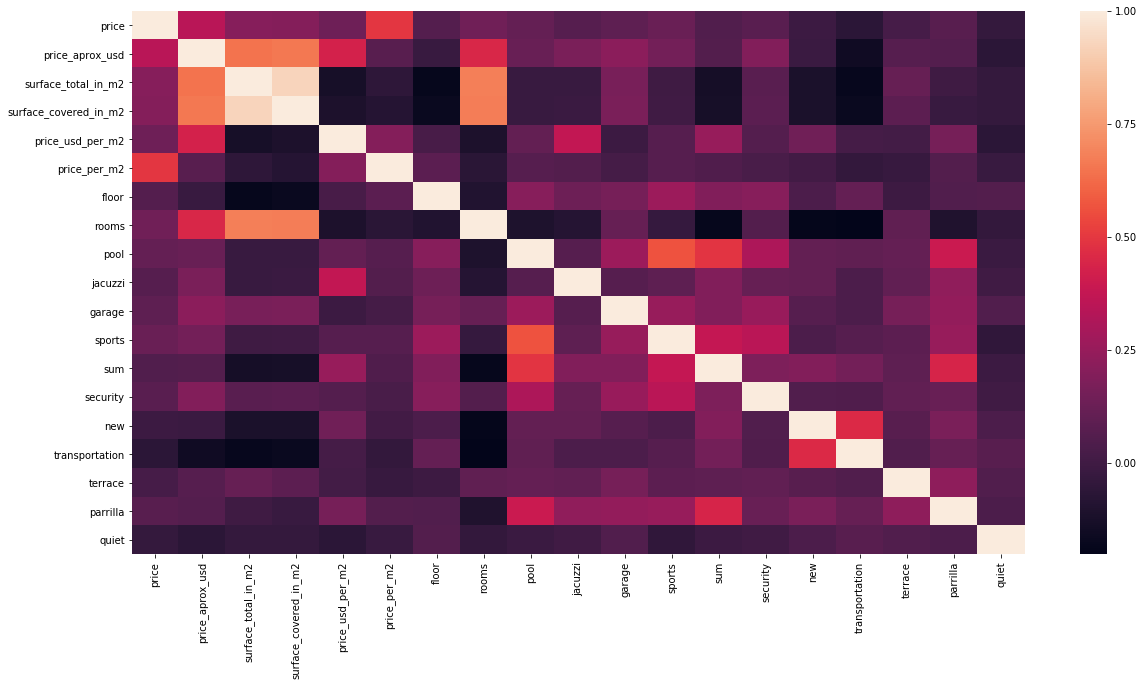

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(capfed.corr())

In [40]:
capfed.corr()

,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,pool,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
price,1.00,0.29,0.15,0.14,0.12,0.51,0.06,0.11,0.10,0.07,0.07,0.11,0.05,0.06,-0.01,-0.05,0.02,0.08,-0.03
price_aprox_usd,0.29,1.00,0.61,0.59,0.48,0.07,-0.08,0.46,0.10,0.21,0.20,0.12,0.07,0.16,-0.02,-0.16,0.09,0.09,-0.06
surface_total_in_m2,0.15,0.61,1.00,0.82,-0.18,-0.07,-0.20,0.67,-0.04,-0.04,0.14,-0.03,-0.14,0.05,-0.12,-0.17,0.12,-0.00,-0.03
surface_covered_in_m2,0.14,0.59,0.82,1.00,-0.15,-0.08,-0.19,0.63,-0.03,-0.03,0.14,-0.02,-0.12,0.05,-0.11,-0.15,0.08,-0.01,-0.03
price_usd_per_m2,0.12,0.48,-0.18,-0.15,1.00,0.20,0.01,-0.13,0.10,0.38,-0.02,0.05,0.26,0.05,0.15,0.02,0.01,0.17,-0.06
price_per_m2,0.51,0.07,-0.07,-0.08,0.20,1.00,0.09,-0.07,0.07,0.06,0.02,0.07,0.05,0.03,0.01,-0.04,-0.02,0.06,-0.02
floor,0.06,-0.08,-0.20,-0.19,0.01,0.09,1.00,-0.11,0.20,0.14,0.16,0.25,0.18,0.20,0.05,0.12,-0.01,0.05,0.06
rooms,0.11,0.46,0.67,0.63,-0.13,-0.07,-0.11,1.00,-0.12,-0.09,0.10,-0.05,-0.19,0.04,-0.20,-0.20,0.10,-0.10,-0.03
pool,0.10,0.10,-0.04,-0.03,0.10,0.07,0.20,-0.12,1.00,0.06,0.26,0.56,0.49,0.31,0.11,0.10,0.11,0.40,-0.01
jacuzzi,0.07,0.21,-0.04,-0.03,0.38,0.06,0.14,-0.09,0.06,1.00,0.06,0.08,0.20,0.11,0.11,0.04,0.10,0.23,0.00


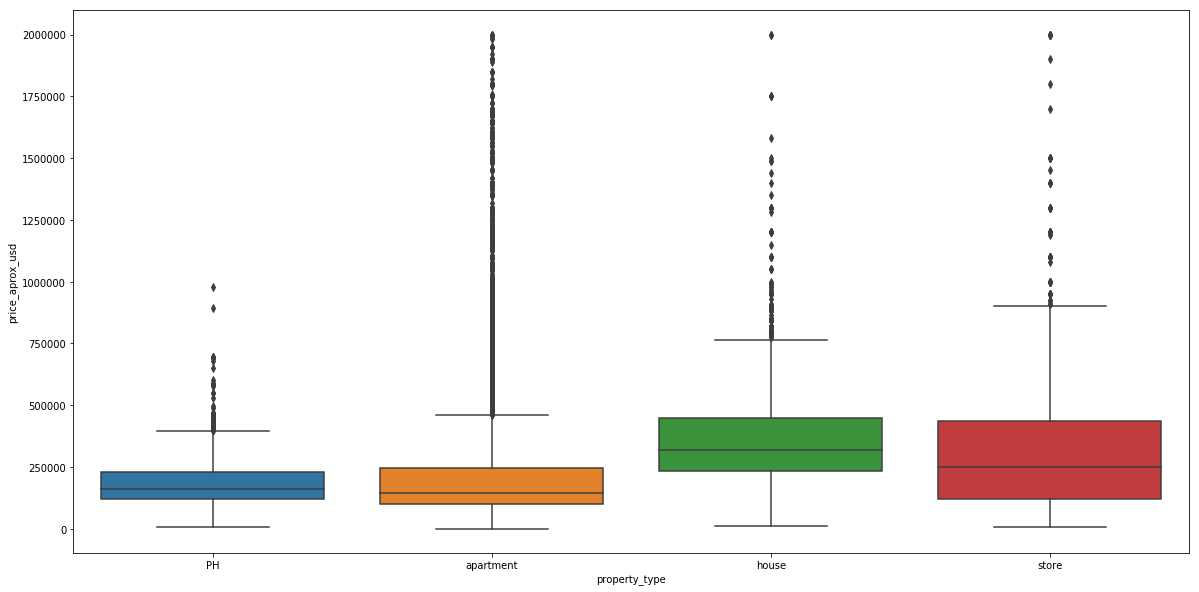

In [64]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x = capfed["property_type"], y = capfed["price_aprox_usd"], data = capfed)

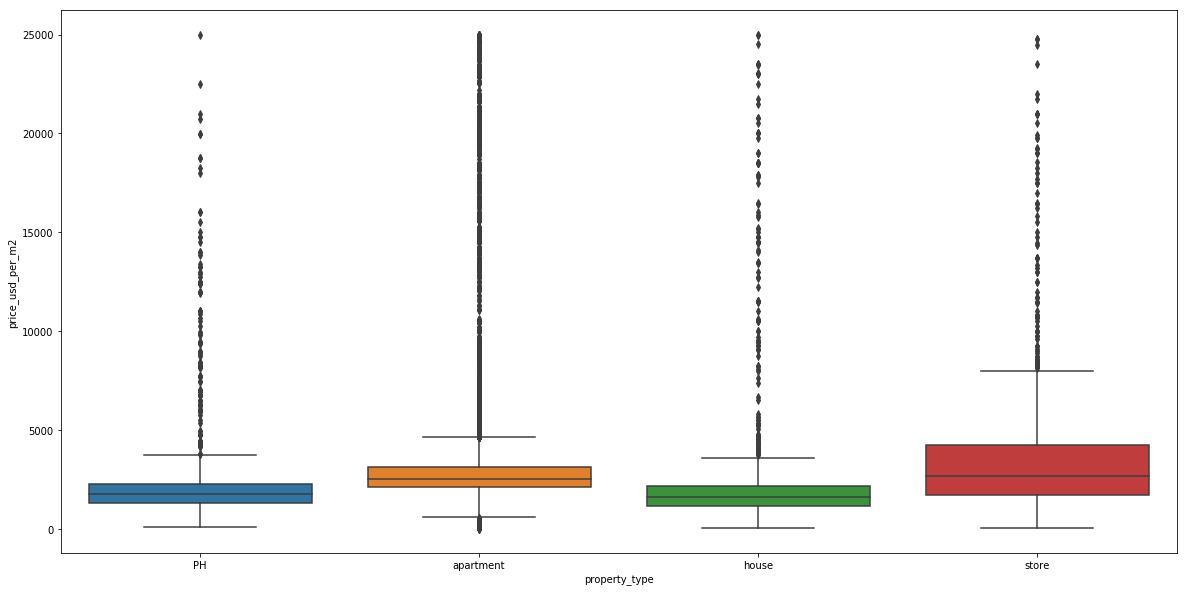

In [68]:
plt.figure(figsize=(20,10))
ay = sns.boxplot(x = capfed["property_type"],y = capfed["price_usd_per_m2"], data = capfed)

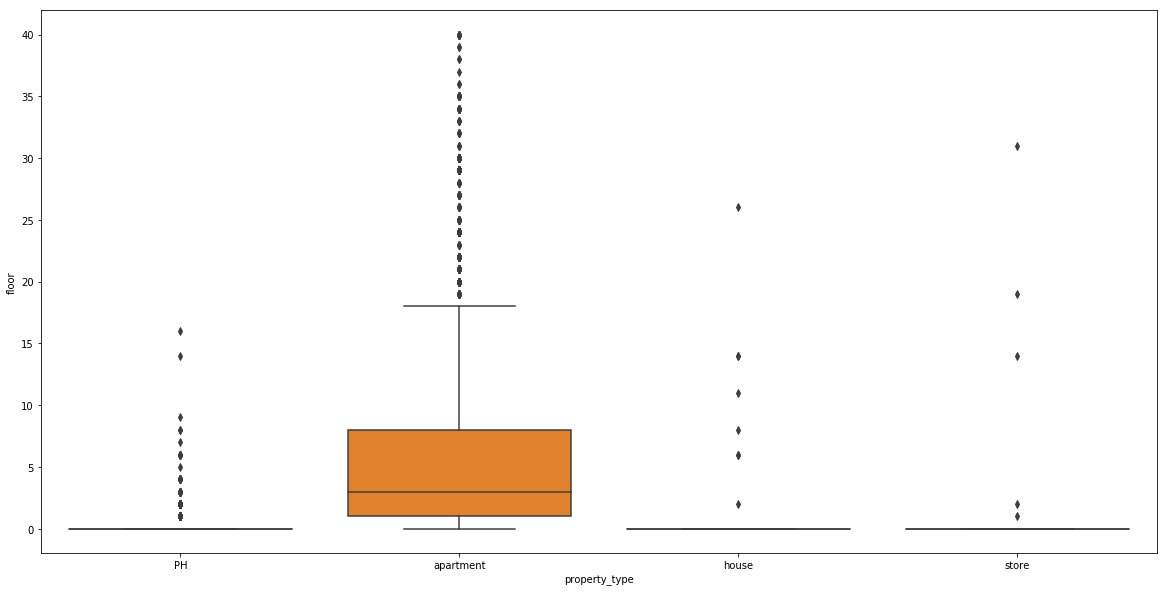

In [67]:
plt.figure(figsize=(20,10))
az = sns.boxplot(x = capfed["property_type"], y = capfed["floor"], data = capfed)

In [84]:
capfed["property_type"].value_counts()

apartment    26344
PH            1740
house         1254
store         1076
Name: property_type, dtype: int64

In [32]:
#Saco las filas duplicadas
capfed = capfed.drop_duplicates()
capfed.describe()

,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,pool,jacuzzi,garage,sports,sum,security,new,transportation,terrace,parrilla,quiet
count,26533.00,26535.00,27542.00,27984.00,26188.00,26194.00,15479.00,23981.00,28451.00,28451.00,28451.00,28451.00,28451.00,28451.00,28451.00,28451.00,28451.00,28451.00,28451.00
mean,358279.56,247344.73,90.60,81.88,3029.11,7704.49,3.87,2.65,0.23,0.05,0.37,0.12,0.21,0.16,0.23,0.34,0.39,0.27,0.15
std,865941.09,278122.54,80.85,77.65,2751.34,18954.01,5.30,1.35,0.42,0.22,0.48,0.32,0.41,0.37,0.42,0.47,0.49,0.45,0.36
min,5500.00,400.00,0.00,0.00,11.76,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,109000.00,105000.00,42.00,38.00,1983.31,2230.77,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,165000.00,155000.00,62.00,55.00,2468.75,2843.90,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,305000.00,271000.00,105.00,95.00,3070.18,3805.09,6.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
max,50000000.00,4400000.00,590.00,2600.00,25000.00,692046.00,40.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


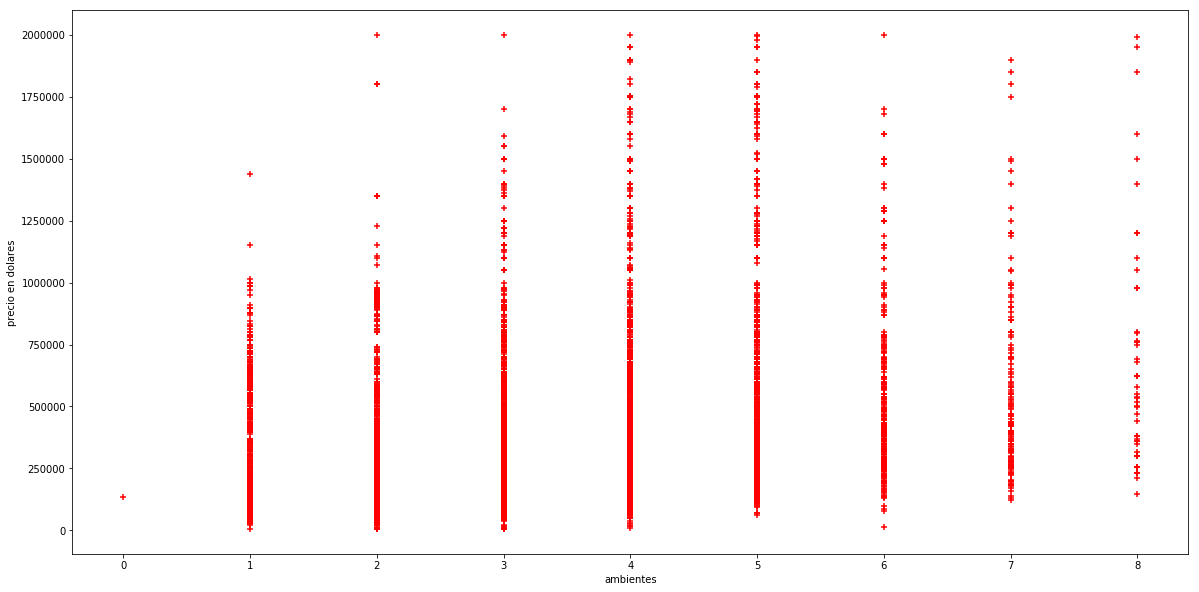

In [60]:
plt.figure(figsize=(20,10))
plt.scatter(capfed["rooms"],capfed["price_aprox_usd"], s=30, c='r', marker='+', zorder=10)
plt.xlabel("ambientes")
plt.ylabel("precio en dolares")
plt.show()

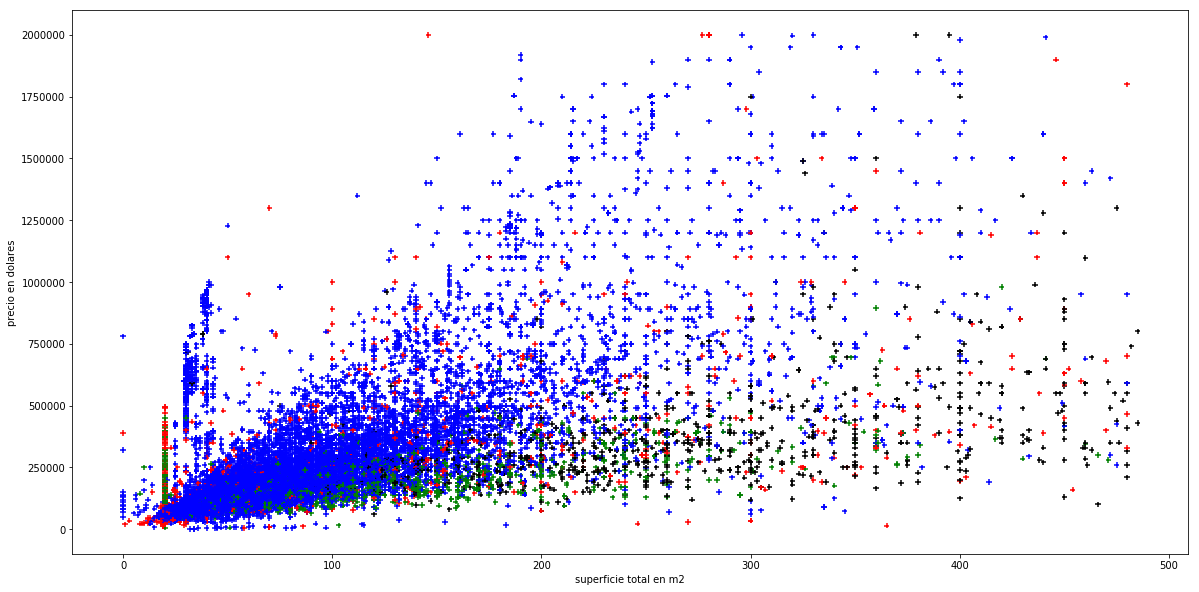

In [58]:
plt.figure(figsize=(20,10))
color = np.where(capfed["property_type"]=="house",'k',np.where(capfed["property_type"]=="apartment",'b',np.where(capfed["property_type"]=="store",'r','g')))
plt.scatter(capfed["surface_total_in_m2"],capfed["price_aprox_usd"], s=30, c=color, marker='+', zorder=10)
plt.xlabel("superficie total en m2")
plt.ylabel("precio en dolares")
plt.show()

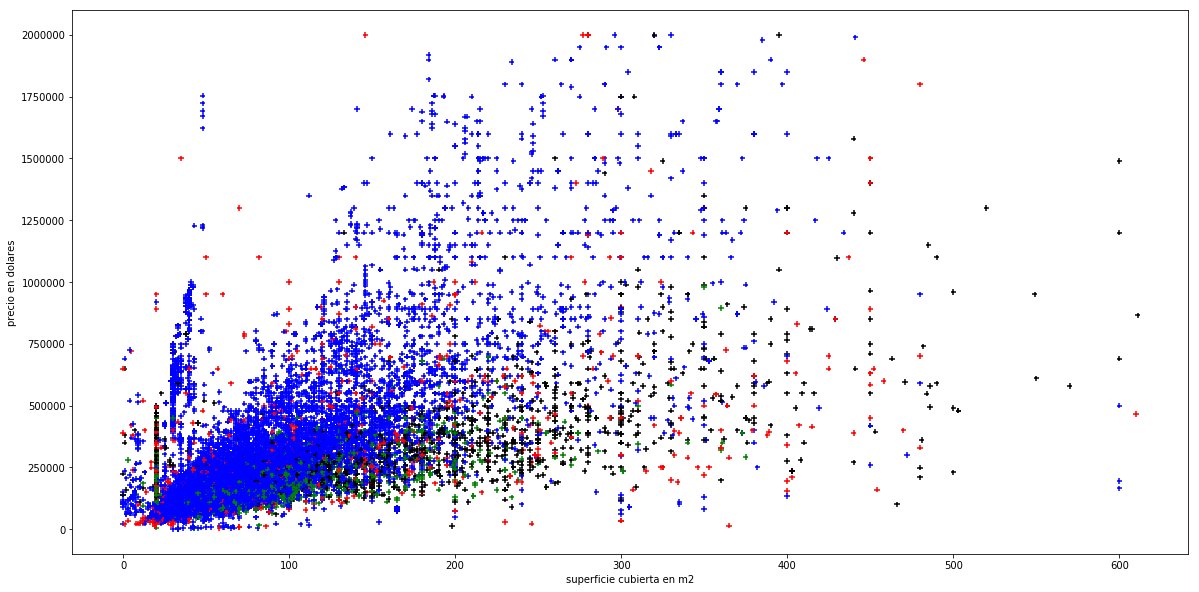

In [59]:
plt.figure(figsize=(20,10))
color = np.where(capfed["property_type"]=="house",'k',np.where(capfed["property_type"]=="apartment",'b',np.where(capfed["property_type"]=="store",'r','g')))
plt.scatter(capfed["surface_covered_in_m2"],capfed["price_aprox_usd"], s=30, c=color, marker='+', zorder=10)
plt.xlabel("superficie cubierta en m2")
plt.ylabel("precio en dolares")
plt.show()

In [33]:
dummies_PT = pd.get_dummies(capfed["property_type"],drop_first = True)
dummies_PT.head()

,apartment,house,store
0,0,0,0
2,1,0,0
3,0,0,0
7,1,0,0
8,1,0,0


In [34]:
dummies_PN = pd.get_dummies(capfed["place_name"],drop_first = True)
dummies_PN.head()

,Agronomia,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,Capital Federal,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredon,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
capfed_wd = pd.concat([capfed,dummies_PT,dummies_PN],axis = 1)
capfed_wd.head()

,property_type,place_name,state_name,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredon,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,PH,Mataderos,Capital Federal,62000.00,62000.00,55.00,40.00,1127.27,1550.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,apartment,Mataderos,Capital Federal,72000.00,72000.00,55.00,55.00,1309.09,1309.09,3.00,...,0,0,0,0,0,0,0,0,0,0
3,PH,Liniers,Capital Federal,95000.00,95000.00,nan,nan,nan,nan,0.00,...,0,0,0,0,0,0,0,0,0,0
7,apartment,Belgrano,Capital Federal,138000.00,138000.00,45.00,40.00,3066.67,3450.00,nan,...,0,0,0,0,0,0,0,0,0,0
8,apartment,Belgrano,Capital Federal,195000.00,195000.00,65.00,60.00,3000.00,3250.00,nan,...,0,0,0,0,0,0,0,0,0,0


In [133]:
capfed_wd.corr()

,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,pool,jacuzzi,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredon,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
price,1.00,0.38,0.23,0.23,0.15,0.49,0.06,0.15,0.11,0.07,...,-0.02,-0.02,-0.01,-0.02,-0.01,-0.00,-0.01,-0.01,0.04,-0.02
price_aprox_usd,0.38,1.00,0.64,0.66,0.42,0.09,-0.03,0.43,0.12,0.15,...,-0.03,-0.04,-0.02,-0.02,-0.01,-0.00,-0.01,-0.01,-0.06,-0.03
surface_total_in_m2,0.23,0.64,1.00,0.93,-0.11,-0.05,-0.18,0.68,-0.01,-0.02,...,0.04,-0.02,-0.01,0.00,0.02,0.02,0.01,-0.00,-0.06,-0.01
surface_covered_in_m2,0.23,0.66,0.93,1.00,-0.09,-0.07,-0.17,0.67,-0.02,-0.02,...,0.04,-0.02,-0.01,0.00,0.01,0.00,-0.01,0.00,-0.06,-0.01
price_usd_per_m2,0.15,0.42,-0.11,-0.09,1.00,0.20,0.02,-0.10,0.11,0.37,...,-0.04,-0.03,-0.01,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.02
price_per_m2,0.49,0.09,-0.05,-0.07,0.20,1.00,0.08,-0.07,0.07,0.06,...,-0.01,0.03,-0.01,-0.01,-0.01,-0.00,0.02,-0.01,0.02,-0.02
floor,0.06,-0.03,-0.18,-0.17,0.02,0.08,1.00,-0.10,0.21,0.13,...,-0.05,-0.03,-0.02,-0.04,-0.03,-0.01,-0.01,-0.01,-0.02,0.01
rooms,0.15,0.43,0.68,0.67,-0.10,-0.07,-0.10,1.00,-0.10,-0.08,...,0.05,-0.00,-0.00,0.00,0.02,0.01,0.00,0.02,-0.03,0.02
pool,0.11,0.12,-0.01,-0.02,0.11,0.07,0.21,-0.10,1.00,0.07,...,-0.03,-0.03,-0.02,-0.02,-0.02,-0.00,-0.01,-0.01,0.03,0.02
jacuzzi,0.07,0.15,-0.02,-0.02,0.37,0.06,0.13,-0.08,0.07,1.00,...,-0.01,-0.02,-0.01,-0.00,-0.01,-0.00,0.00,-0.00,-0.02,-0.02


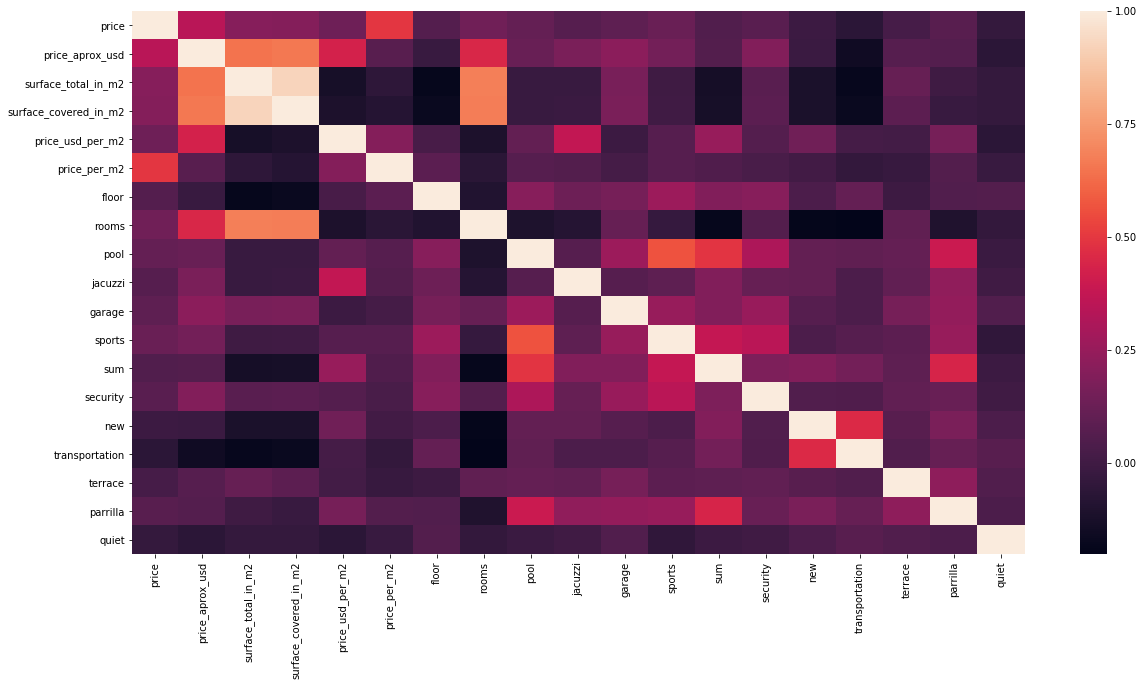

In [69]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(capfed.corr(),ax=ax)

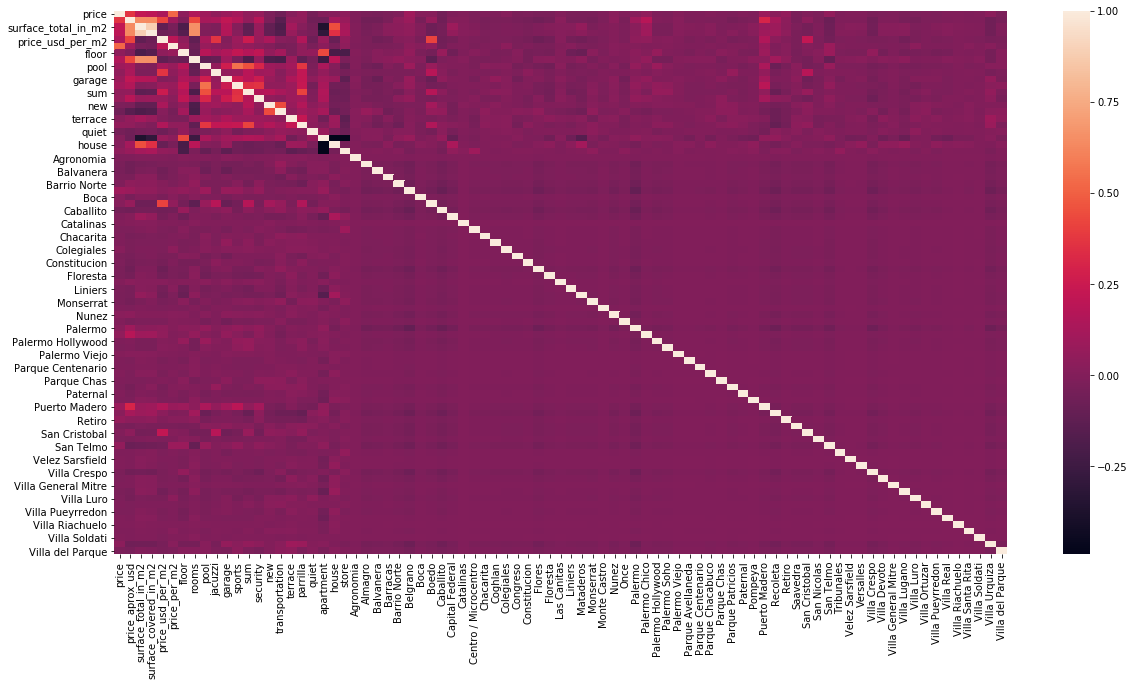

In [70]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(capfed_wd.corr(),ax=ax)

In [40]:
feature_cols = ["surface_total_in_m2","surface_covered_in_m2","pool", "jacuzzi", "garage", "sports", "sum", "security", "new", "transportation", "terrace", "parrilla","quiet"]
feature_cols = feature_cols + list(dummies_PN.columns.values) + list(dummies_PT.columns.values)
relevant_cols = feature_cols + ["price_aprox_usd"]

capfed_wd = capfed_wd.dropna(subset=relevant_cols)

X = capfed_wd[feature_cols]
y = capfed_wd["price_aprox_usd"]

In [41]:
#Pruebo un modelo de regresion lineal

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm = linear_model.LinearRegression()
model_1 = lm.fit(X_train, y_train)

In [149]:
feature_cols

['surface_total_in_m2',
 'surface_covered_in_m2',
 'pool',
 'jacuzzi',
 'garage',
 'sports',
 'sum',
 'security',
 'new',
 'transportation',
 'terrace',
 'parrilla',
 'quiet',
 'Agronomia',
 'Almagro',
 'Balvanera',
 'Barracas',
 'Barrio Norte',
 'Belgrano',
 'Boca',
 'Boedo',
 'Caballito',
 'Capital Federal',
 'Catalinas',
 'Centro / Microcentro',
 'Chacarita',
 'Coghlan',
 'Colegiales',
 'Congreso',
 'Constitucion',
 'Flores',
 'Floresta',
 'Las Canitas',
 'Liniers',
 'Mataderos',
 'Monserrat',
 'Monte Castro',
 'Nunez',
 'Once',
 'Palermo',
 'Palermo Chico',
 'Palermo Hollywood',
 'Palermo Soho',
 'Palermo Viejo',
 'Parque Avellaneda',
 'Parque Centenario',
 'Parque Chacabuco',
 'Parque Chas',
 'Parque Patricios',
 'Paternal',
 'Pompeya',
 'Puerto Madero',
 'Recoleta',
 'Retiro',
 'Saavedra',
 'San Cristobal',
 'San Nicolas',
 'San Telmo',
 'Tribunales',
 'Velez Sarsfield',
 'Versalles',
 'Villa Crespo',
 'Villa Devoto',
 'Villa General Mitre',
 'Villa Lugano',
 'Villa Luro',
 'Vill

In [42]:
print (model_1.intercept_)
print (model_1.coef_)
print (model_1.score(X_test,y_test))

-103735.92961193257
[ 1.68497468e+03  8.55671493e+02  2.63901861e+03  1.23919937e+05
  2.43990702e+04  4.14767270e+04  2.28000882e+04  2.42999264e+04
  2.57293021e+04 -2.84858431e+04 -3.82953631e+03 -4.57575853e+03
 -1.90536609e+04  8.91561080e+03  3.20804654e+04 -1.20283761e+03
 -2.47226016e+04  8.20292976e+04  9.31654652e+04 -3.52860495e+04
  2.20593861e+05  2.29584449e+04  2.50079075e+04 -5.58121703e+04
  2.00829609e+02  2.33549281e+04  2.38978650e+04  2.86171092e+04
 -6.49673708e+02 -3.01130221e+04 -1.09587147e+03 -3.92437610e+03
  1.03896882e+05 -2.07394303e+04 -3.30730773e+04 -9.80161173e+03
  2.25877064e+04  1.09974288e+05  1.42097746e+04  1.12769181e+05
  4.25764612e+05  7.08859721e+04  6.11341630e+04  1.12554308e+05
 -1.87144093e+04  1.53763222e+04 -2.14275701e+04  1.95600895e+04
 -4.16665347e+04  1.88312812e+04 -6.91299144e+04  4.65510255e+05
  1.26900094e+05  9.19846301e+04  1.99202971e+04  1.57181593e+05
  1.05372627e+04 -3.71327997e+03  7.30542466e+02 -2.02877772e+04
  3.5

### Vamos a intentar una regresión polinomial

In [78]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm2 = PolynomialRegression()
model_2 = lm2.fit(X_train, y_train)

In [93]:
print(model_2.score(X_train,y_train))
print(model_2.score(X_test,y_test))

0.808413402857181
-167.47661173869312


In [73]:
#Esto me explota la RAM!
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree'
                                          , degree, cv=7)

plt.plot(degree, np.mean(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show();

MemoryError: 

In [63]:
# Vamos a agregar mas variables al modelo

feature_cols = ["apartment", "house", "store", "ambientes", "superficie cubierta en m2"]
X = cordoba_4[feature_cols]
y = cordoba_4["precio en dolares"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm = linear_model.LinearRegression()
model_3 = lm.fit(X_train, y_train)
print (model_3.intercept_)
print (model_3.coef_)
print (model_3.score(X_train,y_train))
print (model_3.score(X_test,y_test))

-103735.92961193257
[ 1.68497468e+03  8.55671493e+02  2.63901861e+03  1.23919937e+05
  2.43990702e+04  4.14767270e+04  2.28000882e+04  2.42999264e+04
  2.57293021e+04 -2.84858431e+04 -3.82953631e+03 -4.57575853e+03
 -1.90536609e+04  8.91561080e+03  3.20804654e+04 -1.20283761e+03
 -2.47226016e+04  8.20292976e+04  9.31654652e+04 -3.52860495e+04
  2.20593861e+05  2.29584449e+04  2.50079075e+04 -5.58121703e+04
  2.00829609e+02  2.33549281e+04  2.38978650e+04  2.86171092e+04
 -6.49673708e+02 -3.01130221e+04 -1.09587147e+03 -3.92437610e+03
  1.03896882e+05 -2.07394303e+04 -3.30730773e+04 -9.80161173e+03
  2.25877064e+04  1.09974288e+05  1.42097746e+04  1.12769181e+05
  4.25764612e+05  7.08859721e+04  6.11341630e+04  1.12554308e+05
 -1.87144093e+04  1.53763222e+04 -2.14275701e+04  1.95600895e+04
 -4.16665347e+04  1.88312812e+04 -6.91299144e+04  4.65510255e+05
  1.26900094e+05  9.19846301e+04  1.99202971e+04  1.57181593e+05
  1.05372627e+04 -3.71327997e+03  7.30542466e+02 -2.02877772e+04
  3.5

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm2 = PolynomialRegression(2)
model_4 = lm2.fit(X_train, y_train)
print(model_4.score(X_train,y_train))
print(model_4.score(X_test,y_test))

0.808413402857181
-167.47661173869312


In [95]:
#Esto me explota la RAM!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm3 = PolynomialRegression(3)
model_5 = lm3.fit(X_train, y_train)
print(model_5.score(X_train,y_train))
print(model_5.score(X_test,y_test))

MemoryError: 

### RIDGE

In [97]:
from sklearn.linear_model import Ridge

#pruebo dos alphas distintos para ver como ajustan al modelo
rr = Ridge(alpha = 0.01, normalize = True)
rr.fit(X_train,y_train)

rr100 = Ridge(alpha = 1, normalize = True)
rr100.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [98]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test,y_test)
Ridge100_train_score = rr100.score(X_train,y_train)
Ridge100_test_score = rr100.score(X_test,y_test)

print(Ridge_train_score)
print(Ridge_test_score)
print(Ridge100_train_score)
print(Ridge100_test_score)

0.6181744175751919
0.6103818996780601
0.529869870663755
0.5096555326830656


### LASSO

In [99]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [100]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

('training score:', 0.618328787849716)
('test score: ', 0.6104842857500147)
('number of features used: ', 77)


In [101]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

('training score for alpha=0.01:', 0.6183300457296997)
('test score for alpha =0.01: ', 0.6104785772492416)
('number of features used: for alpha =0.01:', 77)
('training score for alpha=0.0001:', 0.6183300459058926)
('test score for alpha =0.0001: ', 0.6104784932048557)
('number of features used: for alpha =0.0001:', 77)
